======================================================
### **Student Information:**
* Name = Peyman
* Last Name = Naseri
* ID = 96100522

======================================================

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

## load and show data

,X1,X2,Y
0,0.004291,-0.174600,-1
1,2.225050,0.117181,1
2,0.274173,-0.514910,-1
3,-1.045133,-0.798009,1
4,1.611457,0.239339,1


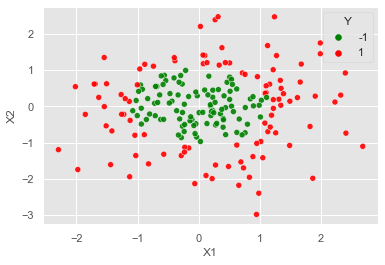

In [2]:
df = pd.read_csv("data.csv")
df = df.drop(columns = ['Unnamed: 0'])
sns.scatterplot(data = df, x='X1', y='X2',hue='Y',alpha=.9, palette=['green', 'red'])
df.head()

## split data into training and test sets 


In [3]:
y = df['Y'].to_numpy()
X = df.drop(columns=['Y']).to_numpy()
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43, shuffle=True)

print('shape X_train:', X_train.shape)
print('shape X_test:', X_test.shape)
print()
print('shape y_test:', y_test.shape)
print('shape y_train:', y_train.shape)


shape X_train: (160, 2)
shape X_test: (40, 2)

shape y_test: (40,)
shape y_train: (160,)


## training model

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)
classifier.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

## predictions and test accuracy


In [5]:
from sklearn.metrics import accuracy_score #accuracy score

predictions_train = classifier.predict(X_train)
training_accuracy = accuracy_score(y_train, predictions_train)
predictions_test = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions_test)
print("Train Accuracy : {0:.2f}".format(100*training_accuracy))
print("Test Accuracy : {0:.2f}".format(100*test_accuracy))

Train Accuracy : 100.00
Test Accuracy : 95.00


## tuning hyperparameters


In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define the model with default hyperparameters
model = AdaBoostClassifier()
print('hyperparameters of model :',list(model.get_params().keys()))

# define the grid of hyperparameters to search
param_grid = {
    'n_estimators' : [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'base_estimator' : [DecisionTreeClassifier(max_depth=i) for i in range(1,5)]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  #evaluation procedure
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy') #search procedure
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


hyperparameters of model : ['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state']
Best: 0.946667 using {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 50}


## training best model

In [7]:
classifier = grid_result.best_estimator_
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

## predictions and test accuracy of best model

In [8]:
predictions_train = classifier.predict(X_train)
training_accuracy = accuracy_score(y_train, predictions_train)
predictions_test = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions_test)
print("Train Accuracy : {0:.2f}".format(100*training_accuracy))
print("Test Accuracy : {0:.2f}".format(100*test_accuracy))

Train Accuracy : 100.00
Test Accuracy : 95.00
